In [6]:
pip install pyspark pandas seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 13.1 MB 5.0 MB/s            
     |████████████████████████████████| 294 kB 89.5 MB/s            
     |████████████████████████████████| 8.3 MB 81.6 MB/s            
     |████████████████████████████████| 346 kB 80.0 MB/s            
     |████████████████████████████████| 19.5 MB 34.4 MB/s            
     |████████████████████████████████| 4.5 MB 71.4 MB/s            
     |████████████████████████████████| 321 kB 86.4 MB/s            
     |████████████████████████████████| 1.6 MB 72.3 MB/s            
     |████████████████████████████████| 4.6 MB 80.9 MB/s            
You should consider upgrading via the '/usr/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
from pyspark.sql import SparkSession

# Crear la sesión de Spark
spark = SparkSession.builder \
    .appName("Leer datos particionados") \
    .getOrCreate()

# Ruta al directorio donde están los archivos particionados
hdfs_path = "hdfs://hadoop-master:9000/home/ec2-user/RAY/metrics/logs-1-batch-12000-"

# Leer los datos como un DataFrame
df = spark.read.csv(
    hdfs_path,
    header=True,  # Si los archivos tienen encabezados
    inferSchema=True  # Inferir automáticamente el tipo de datos
)

# Mostrar las primeras filas del DataFrame
df.show()

# Imprimir el esquema del DataFrame
df.printSchema()

# Detener la sesión de Spark
spark.stop()


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/01/04 06:20:09 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
                                                                                

+--------------------+------+---------+------------+
|                 tag|  step|    value|   wall_time|
+--------------------+------+---------+------------+
|  training/grad_norm|108000|7.2409463|1.73537139E9|
|  training/grad_norm|120000| 7.636296|1.73537152E9|
|  training/grad_norm|132000|7.9644656|1.73537165E9|
|  training/grad_norm|144000| 8.350924|1.73537165E9|
|  training/grad_norm|156000| 8.581194|1.73537178E9|
|  training/grad_norm|168000| 8.794791|1.73537178E9|
|  training/grad_norm|180000|8.8627405| 1.7353719E9|
|  training/grad_norm|192000| 9.010487| 1.7353719E9|
|  training/grad_norm|204000| 9.472234|1.73537203E9|
|training/learning...| 12000|171.25055|1.73537088E9|
|training/learning...| 24000|162.75806|1.73537101E9|
|training/learning...| 36000|170.44263|1.73537101E9|
|training/learning...| 48000|173.41348|1.73537114E9|
|training/learning...| 60000|160.12733|1.73537114E9|
|training/learning...| 72000|165.23479|1.73537126E9|
|training/learning...| 84000|175.47945|1.73537

Datos leídos correctamente desde HDFS.
Primeras filas del DataFrame:
+------------------+------+---------+------------+
|               tag|  step|    value|   wall_time|
+------------------+------+---------+------------+
|training/grad_norm|108000|7.2409463|1.73537139E9|
|training/grad_norm|120000| 7.636296|1.73537152E9|
|training/grad_norm|132000|7.9644656|1.73537165E9|
|training/grad_norm|144000| 8.350924|1.73537165E9|
|training/grad_norm|156000| 8.581194|1.73537178E9|
+------------------+------+---------+------------+
only showing top 5 rows


Esquema del DataFrame:
root
 |-- tag: string (nullable = true)
 |-- step: integer (nullable = true)
 |-- value: double (nullable = true)
 |-- wall_time: double (nullable = true)


DataFrame con columna 'experiment':
+------------------+------+---------+------------+----------+
|               tag|  step|    value|   wall_time|experiment|
+------------------+------+---------+------------+----------+
|training/grad_norm|108000|7.2409463|1.73537

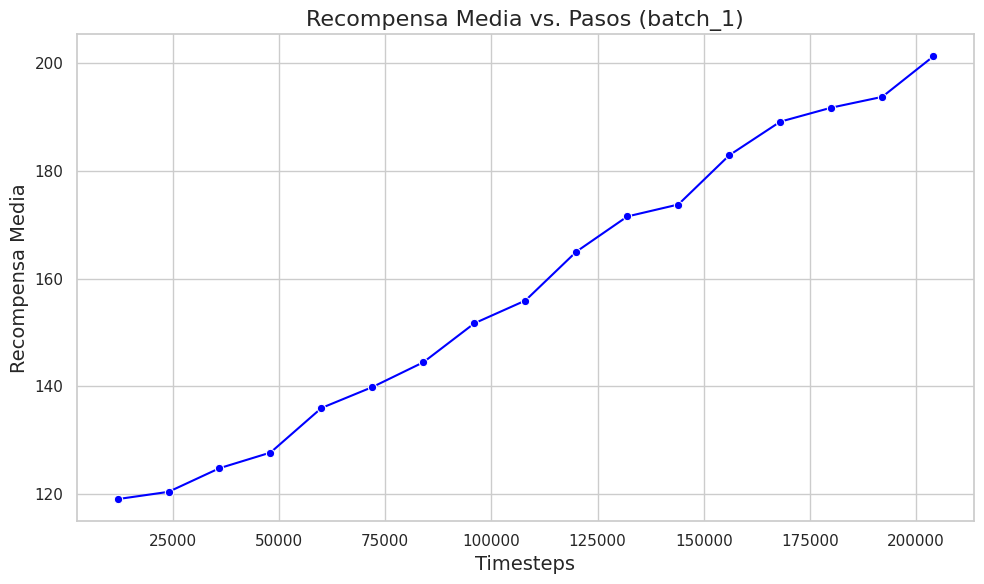

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import lit
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ============================================================
# 1) Crear la sesión de Spark
# ============================================================
spark = SparkSession.builder \
    .appName("Leer datos batch_1") \
    .getOrCreate()

# ============================================================
# 2) Definir la ruta de HDFS para batch_1
# ============================================================
hdfs_path = "hdfs://hadoop-master:9000/home/ec2-user/RAY/metrics/logs-1-batch-12000-"

# ============================================================
# 3) Leer los datos como un DataFrame de Spark
# ============================================================
try:
    df = spark.read.csv(
        hdfs_path,
        header=True,        # Asume que los archivos tienen encabezados
        inferSchema=True    # Infieren automáticamente el tipo de datos
    )
    print("Datos leídos correctamente desde HDFS.")
except Exception as e:
    print(f"Error al leer {hdfs_path}: {e}")
    spark.stop()
    exit()

# ============================================================
# 4) Mostrar las primeras filas y el esquema del DataFrame
# ============================================================
print("Primeras filas del DataFrame:")
df.show(5)

print("\nEsquema del DataFrame:")
df.printSchema()

# ============================================================
# 5) Agregar una columna para identificar el experimento (batch_1)
# ============================================================
df = df.withColumn("experiment", lit("batch_1"))

# Verificar la actualización
print("\nDataFrame con columna 'experiment':")
df.show(5)

# ============================================================
# 6) Convertir el DataFrame de Spark a pandas
# ============================================================
print("\nConvirtiendo el DataFrame de Spark a pandas...")
df_pandas = df.toPandas()
print("Conversión a pandas completada.")

# ============================================================
# 7) Verificar los 'tags' disponibles
# ============================================================
print("\nMétricas (tags) disponibles en df_pandas:")
print(df_pandas["tag"].unique())

# ============================================================
# 8) Filtrar los datos para una métrica específica
#    Por ejemplo: 'agent/reward_mean'
# ============================================================
metric_tag = "agent/reward_mean"
title_text = "Recompensa Media vs. Pasos (batch_1)"

df_metric = df_pandas[df_pandas["tag"] == metric_tag]

if df_metric.empty:
    print(f"No se encontró la métrica '{metric_tag}' en los datos.")
    spark.stop()
    exit()
else:
    print(f"\nDatos filtrados para la métrica '{metric_tag}':")
    print(df_metric.head())

# ============================================================
# 9) Crear un gráfico sencillo usando seaborn y matplotlib
# ============================================================
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_metric,
    x="step",
    y="value",
    marker="o",
    color="blue"
)

plt.title(title_text, fontsize=16)
plt.xlabel("Timesteps", fontsize=14)
plt.ylabel("Recompensa Media", fontsize=14)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# ============================================================
# 10) Detener la sesión de Spark
# ============================================================
spark.stop()



Datos filtrados para la métrica 'agent/reward_max':
                  tag   step      value     wall_time experiment
145  agent/reward_max  12000  247.41990  1.735371e+09    batch_1
146  agent/reward_max  24000  269.26544  1.735371e+09    batch_1
147  agent/reward_max  36000  310.70428  1.735371e+09    batch_1
148  agent/reward_max  48000  332.85138  1.735371e+09    batch_1
149  agent/reward_max  60000  307.25570  1.735371e+09    batch_1


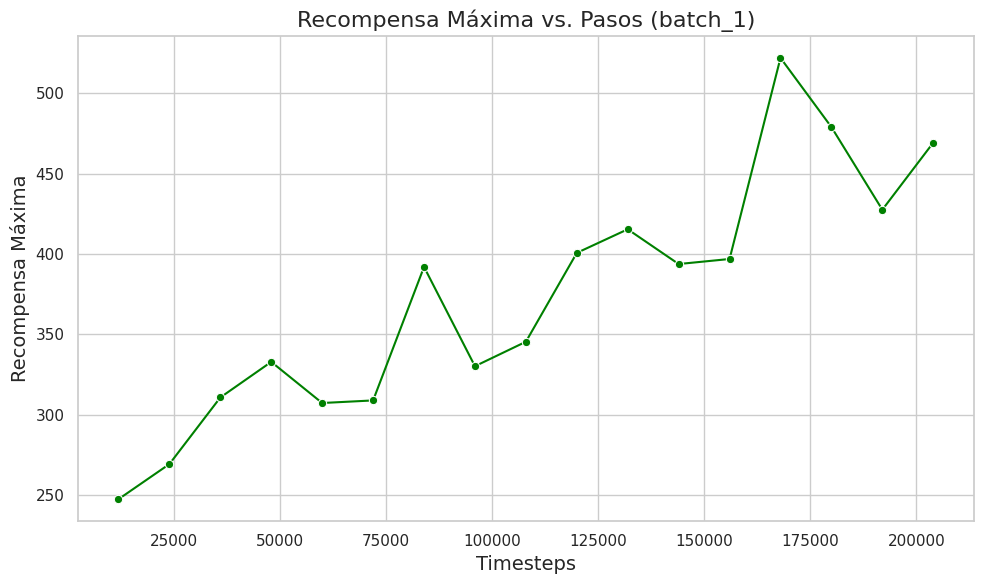

In [3]:
# Definir una nueva métrica
metric_tag = "agent/reward_max"
title_text = "Recompensa Máxima vs. Pasos (batch_1)"

# Filtrar los datos para la nueva métrica
df_metric = df_pandas[df_pandas["tag"] == metric_tag]

if df_metric.empty:
    print(f"No se encontró la métrica '{metric_tag}' en los datos.")
else:
    print(f"\nDatos filtrados para la métrica '{metric_tag}':")
    print(df_metric.head())

    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        data=df_metric,
        x="step",
        y="value",
        marker="o",
        color="green"
    )
    
    plt.title(title_text, fontsize=16)
    plt.xlabel("Timesteps", fontsize=14)
    plt.ylabel("Recompensa Máxima", fontsize=14)
    plt.tight_layout()
    plt.show()


Datos leídos correctamente desde HDFS.
Primeras filas del DataFrame:
+------------------+------+---------+------------+
|               tag|  step|    value|   wall_time|
+------------------+------+---------+------------+
|training/grad_norm|108000|7.2409463|1.73537139E9|
|training/grad_norm|120000| 7.636296|1.73537152E9|
|training/grad_norm|132000|7.9644656|1.73537165E9|
|training/grad_norm|144000| 8.350924|1.73537165E9|
|training/grad_norm|156000| 8.581194|1.73537178E9|
+------------------+------+---------+------------+
only showing top 5 rows


Esquema del DataFrame:
root
 |-- tag: string (nullable = true)
 |-- step: integer (nullable = true)
 |-- value: double (nullable = true)
 |-- wall_time: double (nullable = true)


DataFrame con columna 'experiment':
+------------------+------+---------+------------+----------+
|               tag|  step|    value|   wall_time|experiment|
+------------------+------+---------+------------+----------+
|training/grad_norm|108000|7.2409463|1.73537

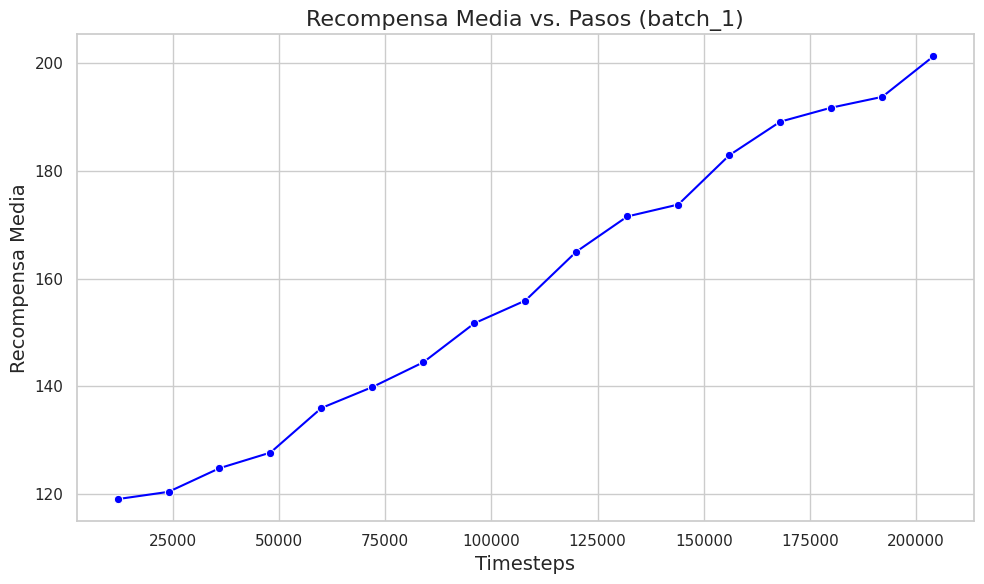

In [12]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import lit
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ============================================================
# 1) Crear la sesión de Spark
# ============================================================
spark = SparkSession.builder \
    .appName("Leer datos batch_1") \
    .getOrCreate()

# ============================================================
# 2) Definir la ruta de HDFS para batch_1
# ============================================================
# Ajustada para que coincida con la ruta funcional del primer código
hdfs_path = "hdfs://hadoop-master:9000/home/ec2-user/RAY/metrics/logs-1-batch-12000-"

# ============================================================
# 3) Leer los datos como un DataFrame de Spark
# ============================================================
try:
    df = spark.read.csv(
        hdfs_path,
        header=True,        # Asume que los archivos tienen encabezados
        inferSchema=True    # Infieren automáticamente el tipo de datos
    )
    print("Datos leídos correctamente desde HDFS.")
except Exception as e:
    print(f"Error al leer {hdfs_path}: {e}")
    spark.stop()
    exit()

# ============================================================
# 4) Mostrar las primeras filas y el esquema del DataFrame
# ============================================================
print("Primeras filas del DataFrame:")
df.show(5)

print("\nEsquema del DataFrame:")
df.printSchema()

# ============================================================
# 5) Agregar una columna para identificar el experimento (batch_1)
# ============================================================
df = df.withColumn("experiment", lit("batch_1"))

# Verificar la actualización
print("\nDataFrame con columna 'experiment':")
df.show(5)

# ============================================================
# 6) Convertir el DataFrame de Spark a pandas
# ============================================================
print("\nConvirtiendo el DataFrame de Spark a pandas...")
df_pandas = df.toPandas()
print("Conversión a pandas completada.")

# ============================================================
# 7) Verificar los 'tags' disponibles
# ============================================================
print("\nMétricas (tags) disponibles en df_pandas:")
print(df_pandas["tag"].unique())

# ============================================================
# 8) Filtrar los datos para una métrica específica
#    Por ejemplo: 'agent/reward_mean'
# ============================================================
metric_tag = "agent/reward_mean"
title_text = "Recompensa Media vs. Pasos (batch_1)"

df_metric = df_pandas[df_pandas["tag"] == metric_tag]

if df_metric.empty:
    print(f"No se encontró la métrica '{metric_tag}' en los datos.")
    spark.stop()
    exit()
else:
    print(f"\nDatos filtrados para la métrica '{metric_tag}':")
    print(df_metric.head())

# ============================================================
# 9) Crear un gráfico sencillo usando seaborn y matplotlib
# ============================================================
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_metric,
    x="step",
    y="value",
    marker="o",
    color="blue"
)

plt.title(title_text, fontsize=16)
plt.xlabel("Timesteps", fontsize=14)
plt.ylabel("Recompensa Media", fontsize=14)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [13]:
df.show(5)

+------------------+------+---------+------------+----------+
|               tag|  step|    value|   wall_time|experiment|
+------------------+------+---------+------------+----------+
|training/grad_norm|108000|7.2409463|1.73537139E9|   batch_1|
|training/grad_norm|120000| 7.636296|1.73537152E9|   batch_1|
|training/grad_norm|132000|7.9644656|1.73537165E9|   batch_1|
|training/grad_norm|144000| 8.350924|1.73537165E9|   batch_1|
|training/grad_norm|156000| 8.581194|1.73537178E9|   batch_1|
+------------------+------+---------+------------+----------+
only showing top 5 rows



In [14]:
# Número de filas
num_filas = df.count()

# Número de columnas
num_columnas = len(df.columns)

print(f"Número de filas: {num_filas}, Número de columnas: {num_columnas}")

Número de filas: 255, Número de columnas: 5


In [15]:
df2 = spark.read.csv(
        'hdfs://hadoop-master:9000/home/ec2-user/RAY/metrics/logs-3-batch-12000-',
        header=True,        # Asume que los archivos tienen encabezados
        inferSchema=True    # Infieren automáticamente el tipo de datos
    )

# Número de filas
num_filas = df2.count()

# Número de columnas
num_columnas = len(df2.columns)

print(f"Número de filas: {num_filas}, Número de columnas: {num_columnas}")

Número de filas: 2220, Número de columnas: 4


In [18]:
df5 = spark.read.csv(
        'hdfs://hadoop-master:9000/home/ec2-user/RAY/metrics/logs-5-batch-12000-',
        header=True,        # Asume que los archivos tienen encabezados
        inferSchema=True    # Infieren automáticamente el tipo de datos
    )

# Número de filas
num_filas = df5.count()

# Número de columnas
num_columnas = len(df5.columns)

print(f"Número de filas: {num_filas}, Número de columnas: {num_columnas}")

Número de filas: 2505, Número de columnas: 4


In [16]:
df7 = spark.read.csv(
        'hdfs://hadoop-master:9000/home/ec2-user/RAY/metrics/logs-7-batch-12000-',
        header=True,        # Asume que los archivos tienen encabezados
        inferSchema=True    # Infieren automáticamente el tipo de datos
    )

# Número de filas
num_filas = df2.count()

# Número de columnas
num_columnas = len(df2.columns)

print(f"Número de filas: {num_filas}, Número de columnas: {num_columnas}")

Número de filas: 0, Número de columnas: 4


25/01/04 06:59:29 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


Leyendo datos para batch_1 desde hdfs://hadoop-master:9000/home/ec2-user/RAY/metrics/logs-1-batch-12000-
Datos de batch_1 leídos correctamente.
Leyendo datos para batch_3 desde hdfs://hadoop-master:9000/home/ec2-user/RAY/metrics/logs-3-batch-12000-
Datos de batch_3 leídos correctamente.
Leyendo datos para batch_5 desde hdfs://hadoop-master:9000/home/ec2-user/RAY/metrics/logs-5-batch-12000-
Datos de batch_5 leídos correctamente.
Leyendo datos para batch_7 desde hdfs://hadoop-master:9000/home/ec2-user/RAY/metrics/logs-7-batch-12000-
Datos de batch_7 leídos correctamente.

Todos los datos combinados en un único DataFrame.

Convirtiendo el DataFrame combinado de Spark a pandas...
Conversión a pandas completada.

Métricas (tags) disponibles en df_all_pandas:
['training/policy_loss' 'training/grad_norm'
 'training/learning_throughput' 'system/cpu_utilization'
 'system/ram_utilization' 'system/sampling_throughput'
 'system/sample_time_ms' 'system/time_total_s' 'model/value_explained_var'
 'ag

/tmp/ipykernel_6149/3165695790.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric["step"] = pd.to_numeric(df_metric["step"], errors="coerce")
/tmp/ipykernel_6149/3165695790.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric["value"] = pd.to_numeric(df_metric["value"], errors="coerce")


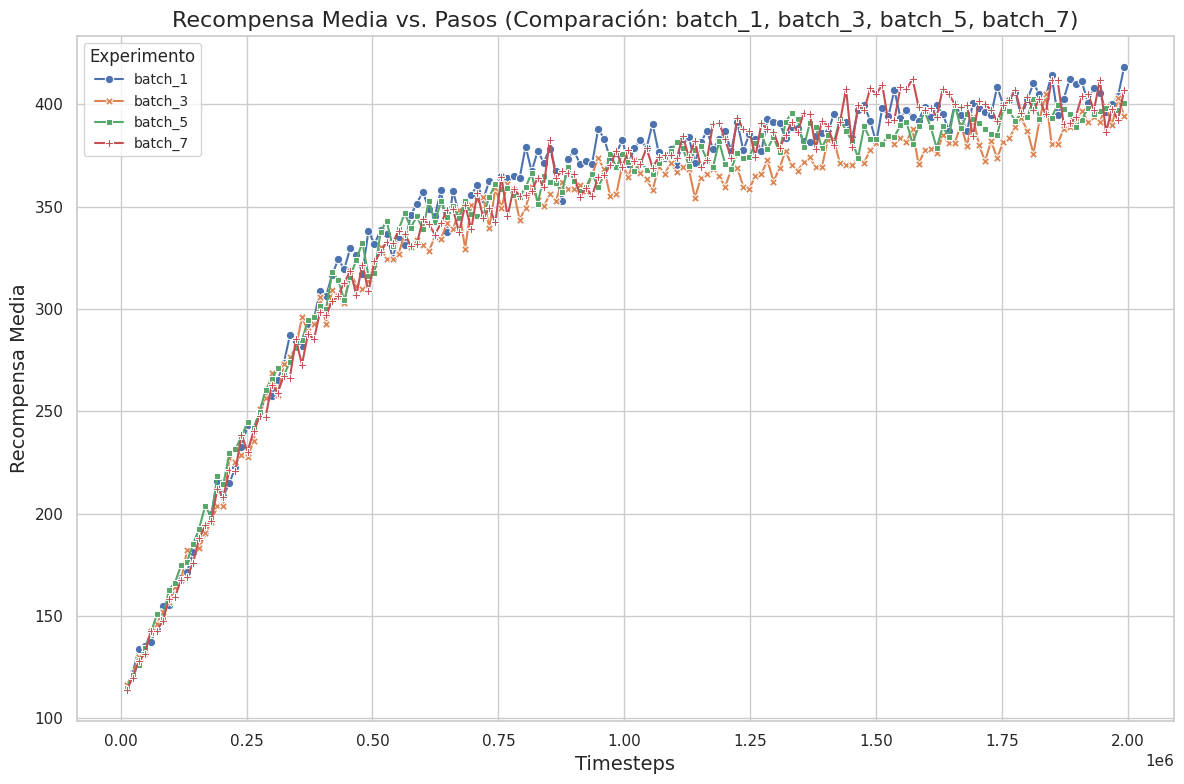

In [19]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import lit
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ============================================================
# 1) Crear la sesión de Spark
# ============================================================
spark = SparkSession.builder \
    .appName("Leer datos de los 4 batches") \
    .getOrCreate()

# ============================================================
# 2) Definir las rutas de HDFS para los 4 batches
# ============================================================
base_dir = "hdfs://hadoop-master:9000/home/ec2-user/RAY/metrics"
experiments = {
    "batch_1": f"{base_dir}/logs-1-batch-12000-",
    "batch_3": f"{base_dir}/logs-3-batch-12000-",
    "batch_5": f"{base_dir}/logs-5-batch-12000-",
    "batch_7": f"{base_dir}/logs-7-batch-12000-"
}

# ============================================================
# 3) Leer los datos de Spark y agregar la columna 'experiment'
# ============================================================
df_list = []
for exp_name, hdfs_path in experiments.items():
    try:
        print(f"Leyendo datos para {exp_name} desde {hdfs_path}")
        df_spark = spark.read.csv(
            hdfs_path,
            header=True,
            inferSchema=True
        )
        # Agregar columna para identificar el experimento
        df_spark = df_spark.withColumn("experiment", lit(exp_name))
        df_list.append(df_spark)
        print(f"Datos de {exp_name} leídos correctamente.")
    except Exception as e:
        print(f"Error al leer {hdfs_path} para {exp_name}: {e}")

# Verificar si se cargaron datos
if not df_list:
    print("No se cargaron datos de ningún batch. Revisa las rutas.")
    spark.stop()
    exit()

# ============================================================
# 4) Combinar los DataFrames
# ============================================================
df_all_spark = df_list[0]
for df_spark in df_list[1:]:
    df_all_spark = df_all_spark.unionByName(df_spark, allowMissingColumns=True)

print("\nTodos los datos combinados en un único DataFrame.")

# ============================================================
# 5) Convertir el DataFrame combinado de Spark a pandas
# ============================================================
print("\nConvirtiendo el DataFrame combinado de Spark a pandas...")
df_all_pandas = df_all_spark.toPandas()
print("Conversión a pandas completada.")

# ============================================================
# 6) Verificar los 'tags' disponibles
# ============================================================
print("\nMétricas (tags) disponibles en df_all_pandas:")
print(df_all_pandas["tag"].unique())

# ============================================================
# 7) Filtrar los datos para una métrica específica
# ============================================================
metric_tag = "agent/reward_mean"
title_text = "Recompensa Media vs. Pasos (Comparación: batch_1, batch_3, batch_5, batch_7)"

df_metric = df_all_pandas[df_all_pandas["tag"] == metric_tag]

if df_metric.empty:
    print(f"No se encontró la métrica '{metric_tag}' en los datos.")
    spark.stop()
    exit()
else:
    print(f"\nDatos filtrados para la métrica '{metric_tag}':")
    print(df_metric.head())

# ============================================================
# 8) Preprocesamiento de los datos para mejorar el gráfico
# ============================================================
df_metric["step"] = pd.to_numeric(df_metric["step"], errors="coerce")
df_metric["value"] = pd.to_numeric(df_metric["value"], errors="coerce")
df_metric = df_metric[df_metric["step"] <= 2000000]  # Limitar pasos a 2 millones
df_metric = df_metric.sort_values(by="step")  # Ordenar por paso

# ============================================================
# 9) Crear un gráfico comparativo usando seaborn y matplotlib
# ============================================================
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df_metric,
    x="step",
    y="value",
    hue="experiment",
    style="experiment",
    markers=True,
    dashes=False
)

plt.title(title_text, fontsize=16)
plt.xlabel("Timesteps", fontsize=14)
plt.ylabel("Recompensa Media", fontsize=14)
plt.legend(title="Experimento", fontsize=10, title_fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# ============================================================
# 10) Detener la sesión de Spark
# ============================================================
spark.stop()


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/01/04 15:17:39 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Leyendo datos para batch_1 desde hdfs://hadoop-master:9000/home/ec2-user/RAY/metrics/logs-1-batch-12000-


Datos de batch_1 leídos correctamente.
Leyendo datos para batch_3 desde hdfs://hadoop-master:9000/home/ec2-user/RAY/metrics/logs-3-batch-12000-


Datos de batch_3 leídos correctamente.
Leyendo datos para batch_5 desde hdfs://hadoop-master:9000/home/ec2-user/RAY/metrics/logs-5-batch-12000-
Datos de batch_5 leídos correctamente.
Leyendo datos para batch_7 desde hdfs://hadoop-master:9000/home/ec2-user/RAY/metrics/logs-7-batch-12000-
Datos de batch_7 leídos correctamente.

Todos los datos combinados en un único DataFrame.

Convirtiendo el DataFrame combinado de Spark a pandas...


Conversión a pandas completada.

Métricas (tags) disponibles en df_all_pandas:
['training/policy_loss' 'training/grad_norm'
 'training/learning_throughput' 'system/cpu_utilization'
 'system/ram_utilization' 'system/sampling_throughput'
 'system/sample_time_ms' 'system/time_total_s' 'model/value_explained_var'
 'agent/reward_mean' 'agent/reward_max' 'agent/reward_min'
 'agent/episode_len_mean' 'agent/kl_divergence' 'training/total_loss']


/tmp/ipykernel_2109/3027782176.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric["step"] = pd.to_numeric(df_metric["step"], errors="coerce")
/tmp/ipykernel_2109/3027782176.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric["value"] = pd.to_numeric(df_metric["value"], errors="coerce")


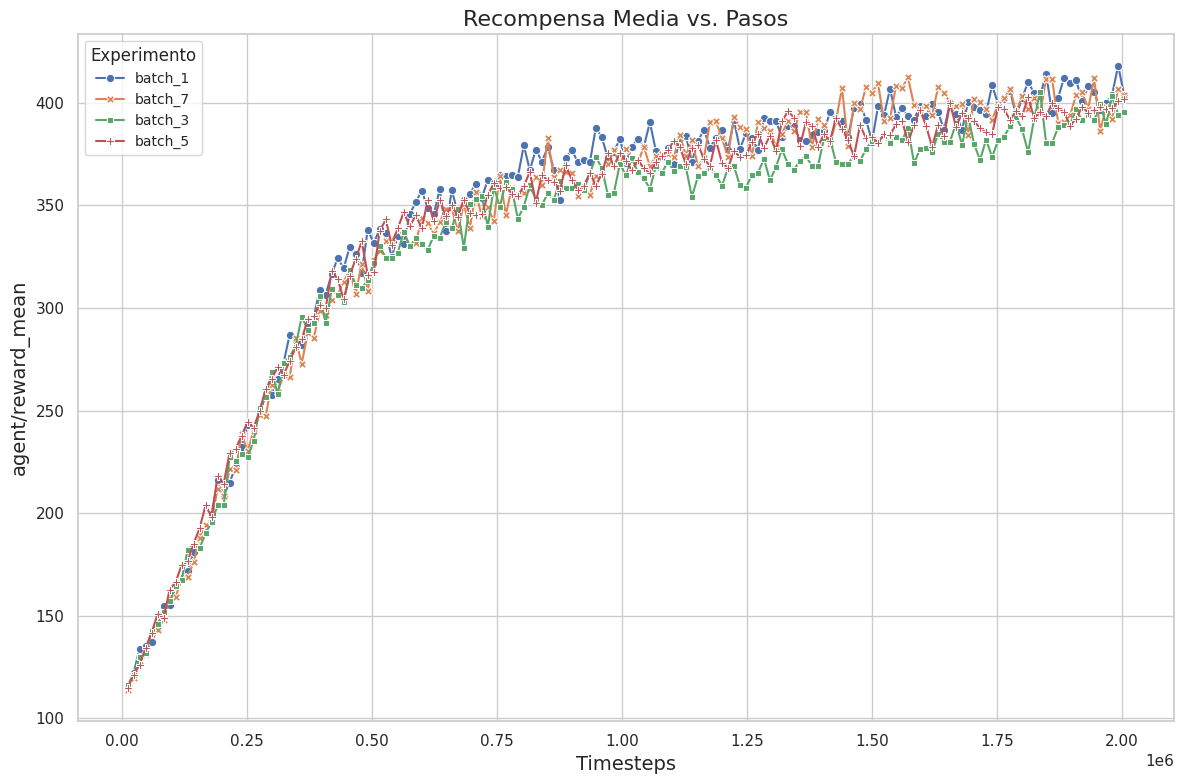

/tmp/ipykernel_2109/3027782176.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric["step"] = pd.to_numeric(df_metric["step"], errors="coerce")
/tmp/ipykernel_2109/3027782176.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric["value"] = pd.to_numeric(df_metric["value"], errors="coerce")


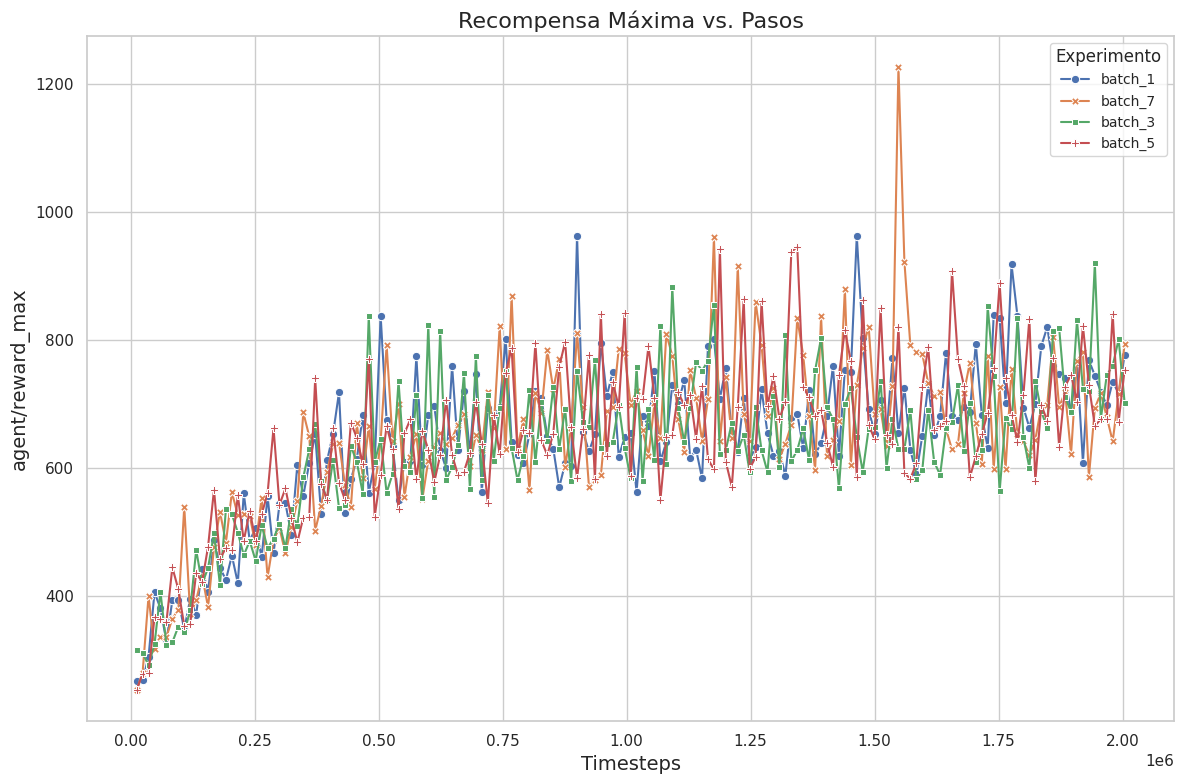

/tmp/ipykernel_2109/3027782176.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric["step"] = pd.to_numeric(df_metric["step"], errors="coerce")
/tmp/ipykernel_2109/3027782176.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric["value"] = pd.to_numeric(df_metric["value"], errors="coerce")


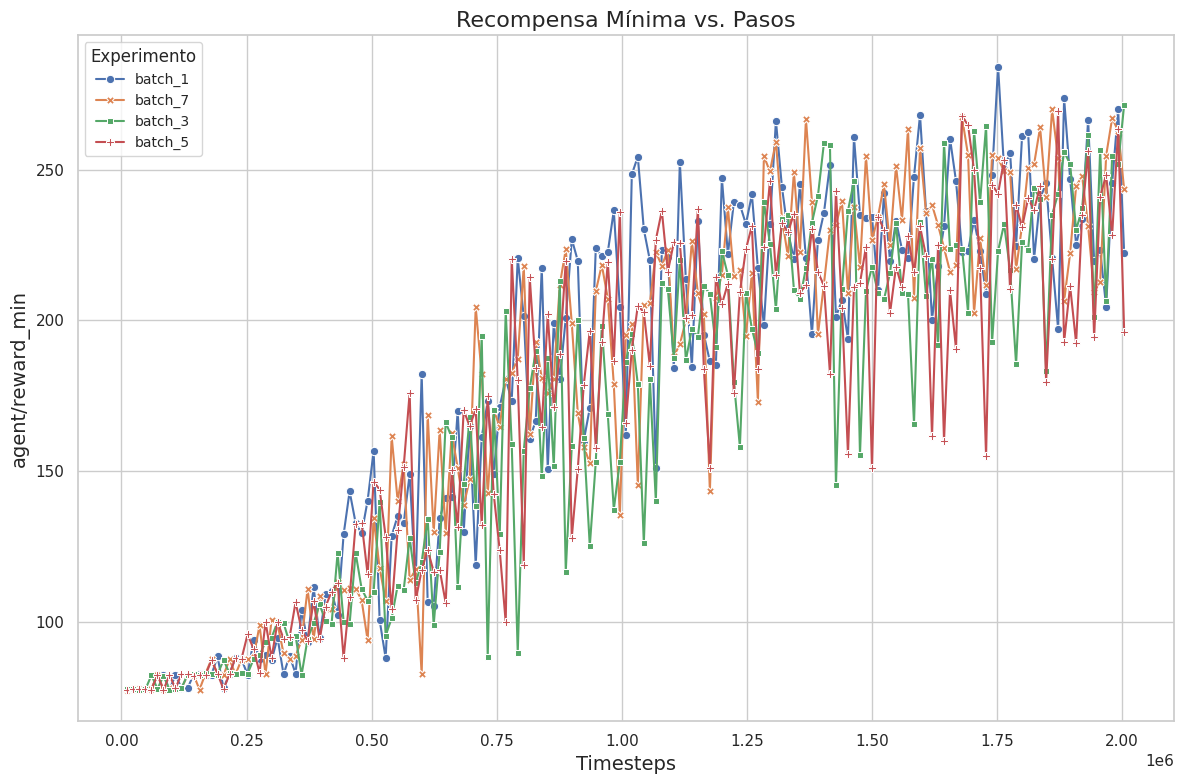

/tmp/ipykernel_2109/3027782176.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric["step"] = pd.to_numeric(df_metric["step"], errors="coerce")
/tmp/ipykernel_2109/3027782176.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric["value"] = pd.to_numeric(df_metric["value"], errors="coerce")


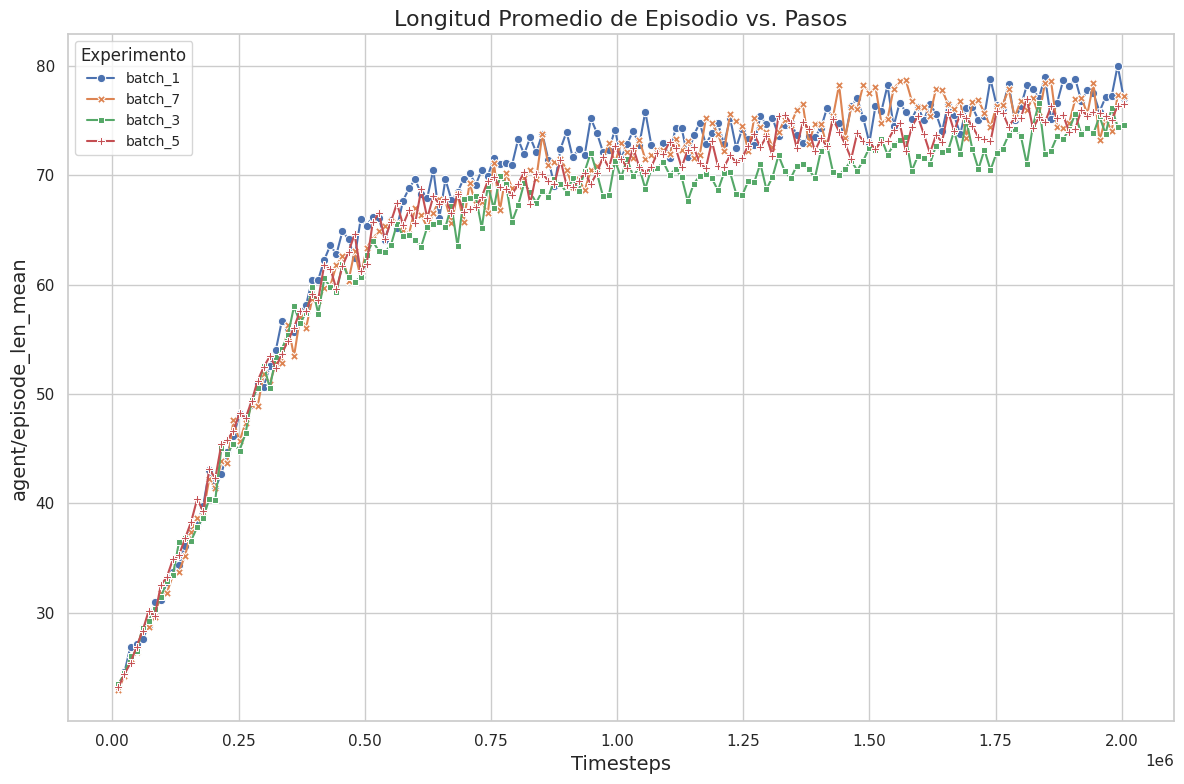

/tmp/ipykernel_2109/3027782176.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric["step"] = pd.to_numeric(df_metric["step"], errors="coerce")
/tmp/ipykernel_2109/3027782176.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric["value"] = pd.to_numeric(df_metric["value"], errors="coerce")


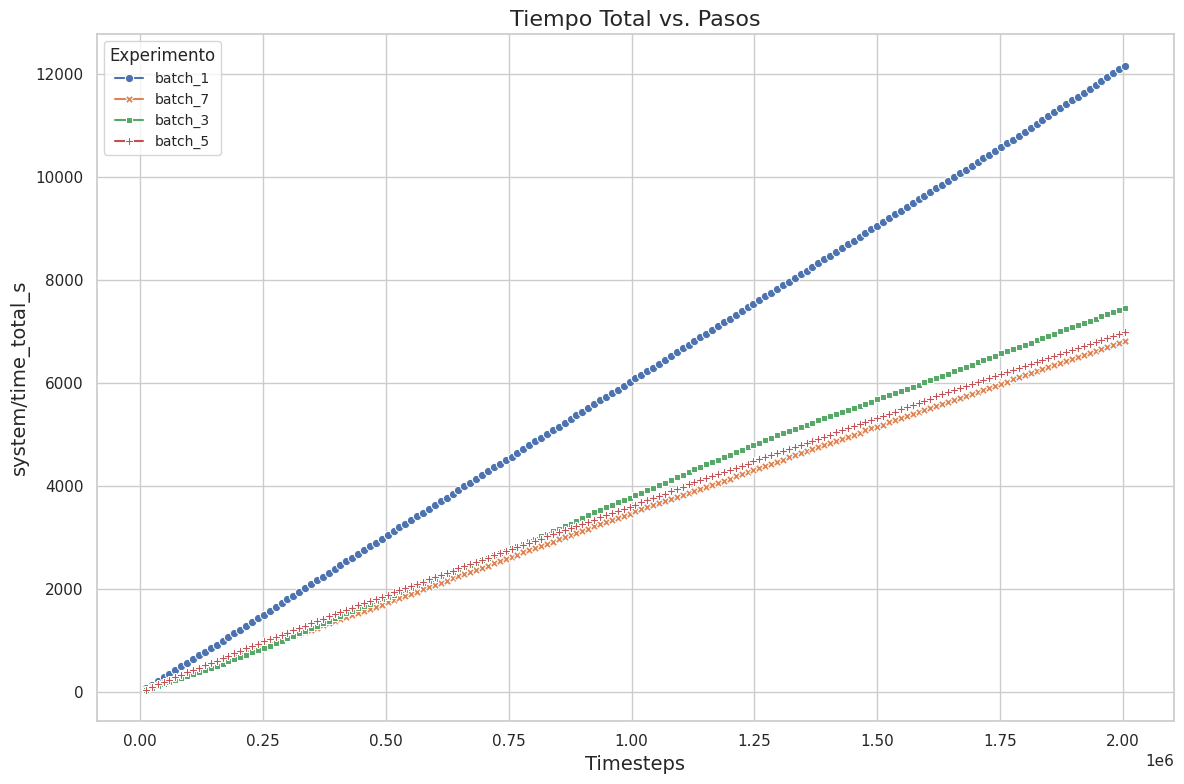

/tmp/ipykernel_2109/3027782176.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric["step"] = pd.to_numeric(df_metric["step"], errors="coerce")
/tmp/ipykernel_2109/3027782176.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric["value"] = pd.to_numeric(df_metric["value"], errors="coerce")


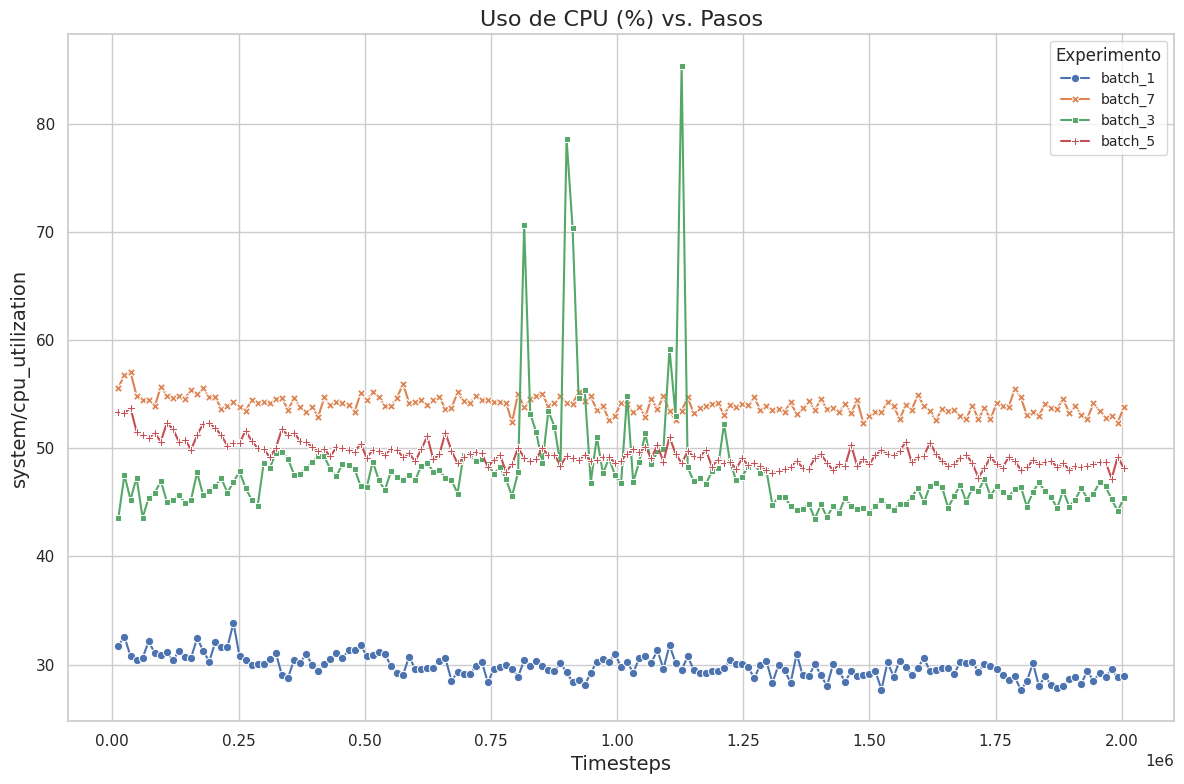

/tmp/ipykernel_2109/3027782176.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric["step"] = pd.to_numeric(df_metric["step"], errors="coerce")
/tmp/ipykernel_2109/3027782176.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric["value"] = pd.to_numeric(df_metric["value"], errors="coerce")


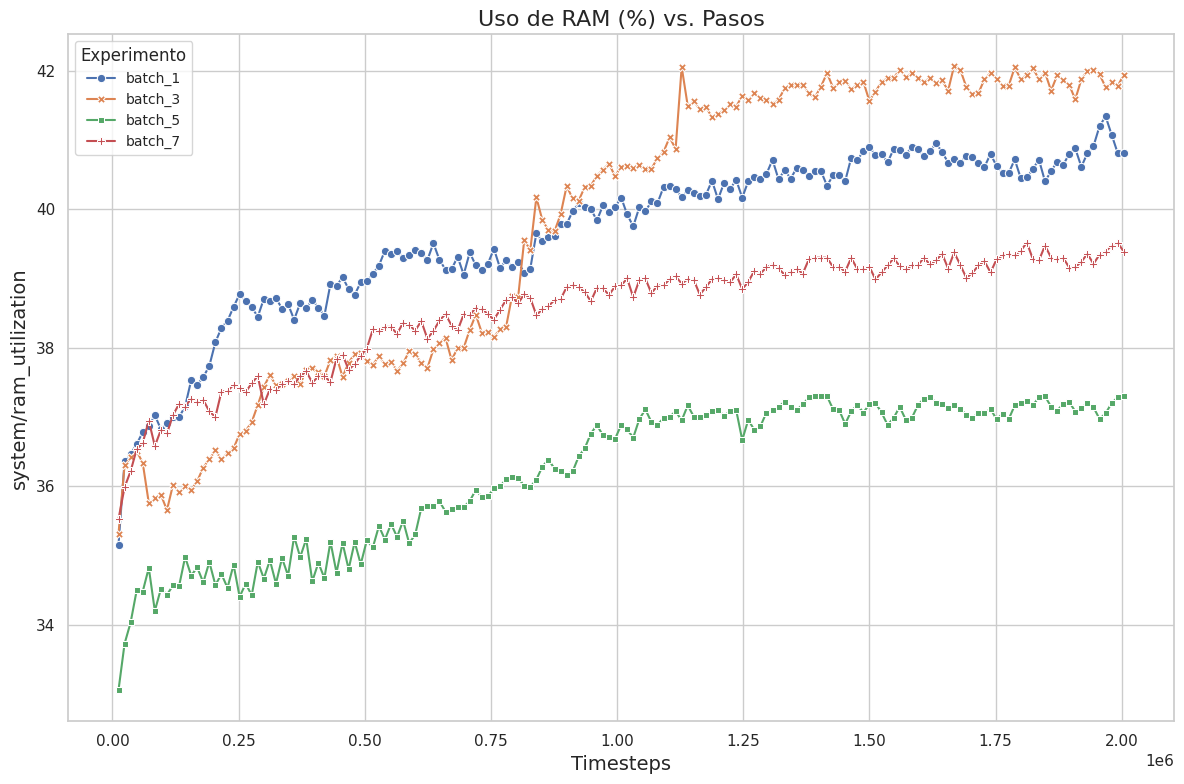

/tmp/ipykernel_2109/3027782176.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric["step"] = pd.to_numeric(df_metric["step"], errors="coerce")
/tmp/ipykernel_2109/3027782176.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric["value"] = pd.to_numeric(df_metric["value"], errors="coerce")


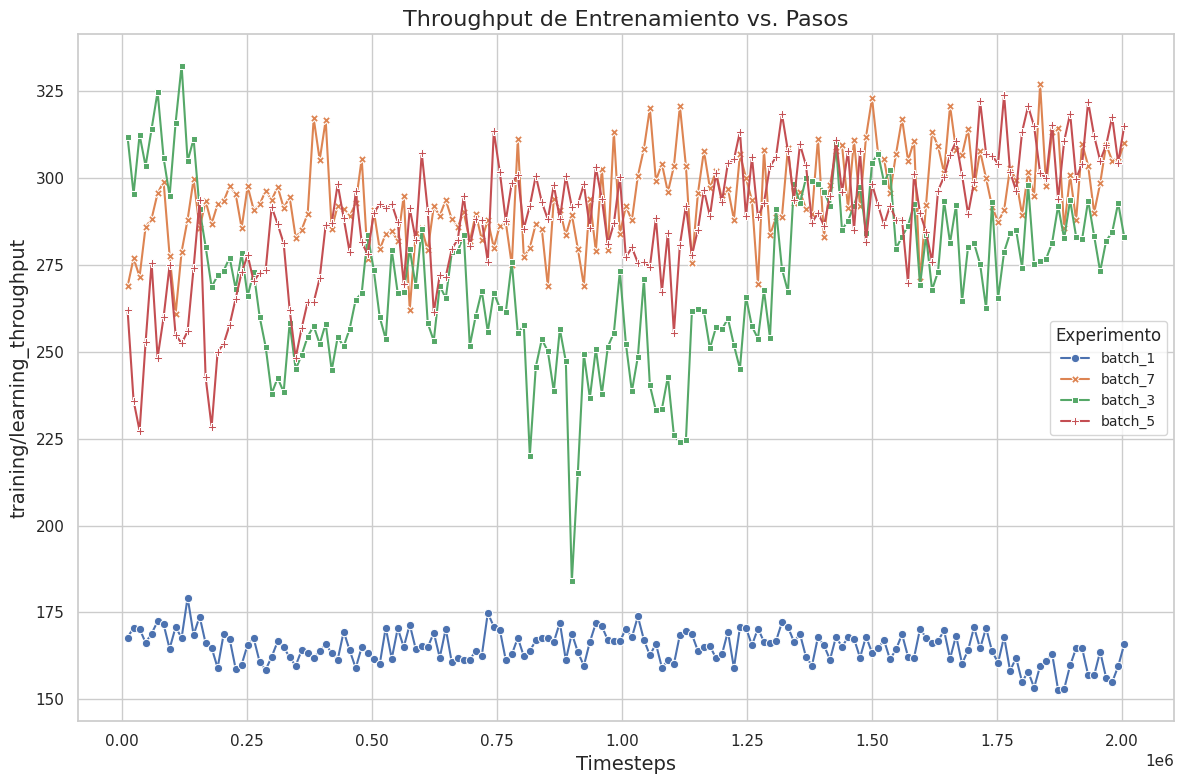

/tmp/ipykernel_2109/3027782176.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric["step"] = pd.to_numeric(df_metric["step"], errors="coerce")
/tmp/ipykernel_2109/3027782176.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric["value"] = pd.to_numeric(df_metric["value"], errors="coerce")


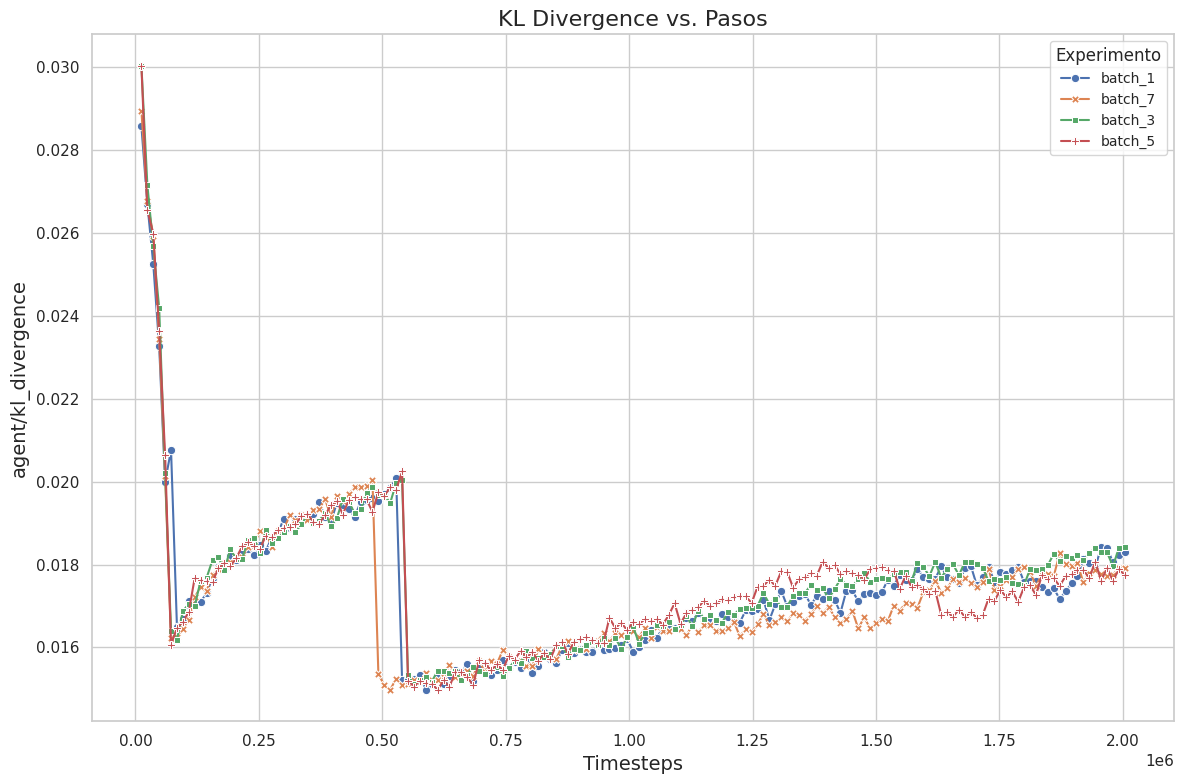

/tmp/ipykernel_2109/3027782176.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric["step"] = pd.to_numeric(df_metric["step"], errors="coerce")
/tmp/ipykernel_2109/3027782176.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric["value"] = pd.to_numeric(df_metric["value"], errors="coerce")


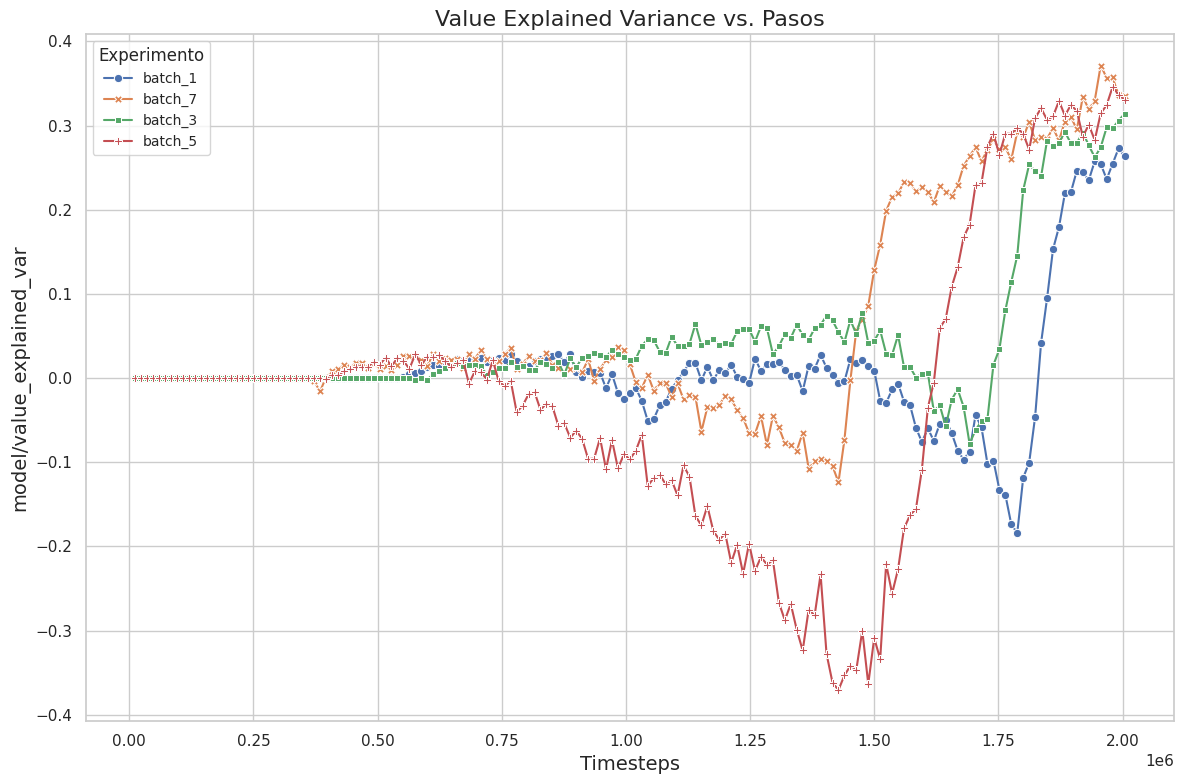

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import lit
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ============================================================
# 1) Crear la sesión de Spark
# ============================================================
spark = SparkSession.builder \
    .appName("Generar 10 gráficos desde HDFS") \
    .getOrCreate()

# ============================================================
# 2) Definir las rutas de HDFS para los 4 batches
# ============================================================
base_dir = "hdfs://hadoop-master:9000/home/ec2-user/RAY/metrics"
experiments = {
    "batch_1": f"{base_dir}/logs-1-batch-12000-",
    "batch_3": f"{base_dir}/logs-3-batch-12000-",
    "batch_5": f"{base_dir}/logs-5-batch-12000-",
    "batch_7": f"{base_dir}/logs-7-batch-12000-"
}

# ============================================================
# 3) Leer los datos de Spark y agregar la columna 'experiment'
# ============================================================
df_list = []
for exp_name, hdfs_path in experiments.items():
    try:
        print(f"Leyendo datos para {exp_name} desde {hdfs_path}")
        df_spark = spark.read.csv(
            hdfs_path,
            header=True,
            inferSchema=True
        )
        # Agregar columna para identificar el experimento
        df_spark = df_spark.withColumn("experiment", lit(exp_name))
        df_list.append(df_spark)
        print(f"Datos de {exp_name} leídos correctamente.")
    except Exception as e:
        print(f"Error al leer {hdfs_path} para {exp_name}: {e}")

# Verificar si se cargaron datos
if not df_list:
    print("No se cargaron datos de ningún batch. Revisa las rutas.")
    spark.stop()
    exit()

# ============================================================
# 4) Combinar los DataFrames
# ============================================================
df_all_spark = df_list[0]
for df_spark in df_list[1:]:
    df_all_spark = df_all_spark.unionByName(df_spark, allowMissingColumns=True)

print("\nTodos los datos combinados en un único DataFrame.")

# ============================================================
# 5) Convertir el DataFrame combinado de Spark a pandas
# ============================================================
print("\nConvirtiendo el DataFrame combinado de Spark a pandas...")
df_all_pandas = df_all_spark.toPandas()
print("Conversión a pandas completada.")

# ============================================================
# 6) Verificar los 'tags' disponibles
# ============================================================
print("\nMétricas (tags) disponibles en df_all_pandas:")
print(df_all_pandas["tag"].unique())

# ============================================================
# 7) Definir las métricas a graficar
# ============================================================
metrics_list = [
    ("agent/reward_mean",         "Recompensa Media vs. Pasos"),
    ("agent/reward_max",          "Recompensa Máxima vs. Pasos"),
    ("agent/reward_min",          "Recompensa Mínima vs. Pasos"),
    ("agent/episode_len_mean",    "Longitud Promedio de Episodio vs. Pasos"),
    ("system/time_total_s",       "Tiempo Total vs. Pasos"),
    ("system/cpu_utilization",    "Uso de CPU (%) vs. Pasos"),
    ("system/ram_utilization",    "Uso de RAM (%) vs. Pasos"),
    ("training/learning_throughput", "Throughput de Entrenamiento vs. Pasos"),
    ("agent/kl_divergence",       "KL Divergence vs. Pasos"),
    ("model/value_explained_var", "Value Explained Variance vs. Pasos")
]

# ============================================================
# 8) Crear un gráfico por cada métrica
# ============================================================
sns.set(style="whitegrid")

for metric_tag, title_text in metrics_list:
    # Filtrar los datos para la métrica actual
    df_metric = df_all_pandas[df_all_pandas["tag"] == metric_tag]

    if df_metric.empty:
        print(f"No se encontró la métrica '{metric_tag}' en los datos. Saltando...")
        continue

    # Convertir columnas a numérico y ordenar
    df_metric["step"] = pd.to_numeric(df_metric["step"], errors="coerce")
    df_metric["value"] = pd.to_numeric(df_metric["value"], errors="coerce")
    df_metric = df_metric.sort_values(by="step")

    # Crear el gráfico
    plt.figure(figsize=(12, 8))
    sns.lineplot(
        data=df_metric,
        x="step",
        y="value",
        hue="experiment",  # Diferenciar por batch
        style="experiment",
        markers=True,
        dashes=False
    )
    plt.title(title_text, fontsize=16)
    plt.xlabel("Timesteps", fontsize=14)
    plt.ylabel(metric_tag, fontsize=14)
    plt.legend(title="Experimento", fontsize=10, title_fontsize=12)
    plt.tight_layout()

    # Mostrar o guardar el gráfico
    plt.show()  # Cambiar por plt.savefig(...) para guardar los gráficos como archivos

# ============================================================
# 9) Detener la sesión de Spark
# ============================================================
spark.stop()
